(nm_ill_conditioning_roundoff_errors)=
# Ill-conditioning and roundoff errors
[<!-- module-nm badge --><span class="module module-nm">Numerical Methods</span>](module-nm) 

## Ill-conditioned matrices

The conditioning (or lack of, i.e. the ill-conditioning) of matrices we are trying to invert is incredibly important for the success of any algorithm.

As long as the matrix is non-singular, i.e. $\det(A)\ne 0$, then an inverse exists, and a linear system with that $A$ has a unique solution. What happens when we consider a matrix that is nearly singular, i.e. $\det(A)$ is very small?

```{index} Matrix norm
```

Well smallness is a relative term and so we need to ask the question of how large or small $\det(A)$ is compared to something. That something is the **norm** of the matrix.

```{margin} Note
Norms are always in absolute terms, therefore, they are always positive. We will use $||||$ to symbolise a norm of a matrix.

```

Matrices come in all shape and sizes, and their determinants come in all kinds of values. We know that a ill conditioned matrix has a determinant that is small in absolute terms, but the size of determinants is a relative thing, and we need some kind of comparison to determine what is "small" and what is "large". Thus, we can create such a reference calculating the norms of the matrix. In this notebook, we will explore how to find the norm and how does the norm relate to the ill conditioning of the matrix. 

## Vector norms

```{index} Vector norms
```

Just as for vectors $\pmb{v}$ (assumed as a $n\times 1$ column vector) where we have multiple possible norms to help us decide quantify the magnitude of a vector:

$$
||\pmb{v}||_2  = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, \quad{\textrm{the two-norm or Euclidean norm}}\\\\\\
||\pmb{v}||_1   = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, \quad{\textrm{the one-norm or taxi-cab norm}}\\\\\\
||\pmb{v}||_{\infty}  = \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|,\quad{\textrm{the max-norm or infinity norm}}
$$

## Matrix norms

```{index} Matrix norms
```

We can define measures of the size of matrices, e.g. for $A$ which for complete generality we will assume is of shape $m\times n$:

$$
||A||_F = \left(\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2 \right)^{1/2}, \quad{\textrm{the matrix Euclidean or Frobenius norm}}\\\\\\
||A||_{\infty} = \max_{i=1}^m \sum_{j=1}^n|A_{i,j}|, \quad{\textrm{the maximum absolute row-sum norm}}\\\\\\
$$

Note that while these norms give different results (in both the vector and matrix cases), they are consistent or equivalent in that they are always within a constant factor of one another (a result that is true for finite-dimensional or discrete problems as here). This means we don't really need to worry too much about which norm we're using.

Let's evaluate some examples.

In [7]:
import numpy as np
import scipy.linalg as sl

A = np.array([[10., 2., 1.],
              [6., 5., 4.],
              [1., 4., 7.]])
print("A =", A)

# The Frobenius norm (default)
# equivalent to sl.norm(A)
print("SciPy norm = ", sl.norm(A, 'fro'))

# The maximum absolute row-sum
print("Maximum absolute row-sum = ", sl.norm(A,np.inf))

# The maximum absolute column-sum
print("Maximum absolute column-sum", sl.norm(A,1))

# The two-norm - note not the same as the Frobenius norm
# also termed the spectral norm
print("SciPy spectral norm =", sl.norm(A,2))

# Spectral norm definition
print("Spectral norm by hand =", np.sqrt(np.real((np.max(sl.eigvals( A.T @ A))))))

A = [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
SciPy norm =  15.748015748023622
Maximum absolute row-sum =  15.0
Maximum absolute column-sum 17.0
SciPy spectral norm = 13.793091098640064
Spectral norm by hand = 13.793091098640065


## Norm implementation

We will write some code to explicitly compute the two matrix norms defined mathematically above (i.e. the Frobenius and the maximum absolute row-sum norms) and compare against the values found above using in-built scipy functions.

In [8]:
def frob(A):
    m, n = A.shape
    squsum = 0.
    for i in range(m):
        for j in range(n):
            squsum += A[i,j]**2
    return np.sqrt(squsum)


def mars(A):
    m, n = A.shape
    maxarsum = 0.
    for i in range(m):
        arsum = np.sum(np.abs(A[i]))
        maxarsum = arsum if arsum > maxarsum else maxarsum
    return maxarsum


A = np.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])


print("A =", A)
print("Are our norms the same as SciPy?",
      frob(A) == sl.norm(A,'fro') and mars(A) == sl.norm(A,np.inf))

A = [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
Are our norms the same as SciPy? True


## Matrix conditioning

The (ill-)conditioning of a matrix is measured with the matrix condition number:

$$\textrm{cond}(A) = \|A\|\|A^{-1}\|.$$

If this is close to one then $A$ is termed well-conditioned; the value increases with the degree of ill-conditioning, reaching infinity for a singular matrix.

Let's evaluate the condition number for the matrix above.

In [12]:
A = np.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])

print("A =", A)
print("SciPy cond(A) =", np.linalg.cond(A))
print("Default condition number uses matrix two-norm =", sl.norm(A,2)*sl.norm(sl.inv(A),2))
print("sl.norm(A,2)*sl.norm(sl.inv(A),2) =", sl.norm(A,2)*sl.norm(sl.inv(A),2))
print("SciPy Frobenius cond(A) = ", np.linalg.cond(A,'fro'))
print("sl.norm(A,'fro')*sl.norm(sl.inv(A),'fro') =", sl.norm(A,'fro')*sl.norm(sl.inv(A),'fro'))

A = [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
SciPy cond(A) = 10.71337188134679
Default condition number uses matrix two-norm = 10.71337188134679
sl.norm(A,2)*sl.norm(sl.inv(A),2) = 10.71337188134679
SciPy Frobenius cond(A) =  12.463616561943587
sl.norm(A,'fro')*sl.norm(sl.inv(A),'fro') = 12.463616561943585


The condition number is expensive to compute, and so in practice the relative size of the determinant of the matrix can be gauged based on the magnitude of the entries of the matrix.

### Example

We know that a singular matrix does not result in a unique solution to its corresponding linear matrix system. But what are the consequences of near-singularity (ill-conditioning)?

Consider the following example

$$
\left(
  \begin{array}{cc}
    2 & 1 \\
    2 & 1 + \epsilon
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y 
  \end{array}
\right) = \left(
  \begin{array}{c}
    3 \\
    0
  \end{array}
\right)
$$

When $\epsilon=0$ the two columns/rows are not linear independent, and hence the determinant of this matrix is zero, the condition number is infinite, and the linear system does not have a solution (as the two equations would be telling us the contradictory information that $2x+y$ is equal to 3 and is also equal to 0).

Let's consider a range of values $\epsilon$ and calculate matrix deteterminant and condition number:

In [26]:
A = np.array([[2.,1.],
                 [2.,1.]])
b = np.array([3.,0.])
print("Matrix is singular, det(A) = ", sl.det(A))

for i in range(3):
    A[1,1] += 0.001
    epsilon = A[1,1]-1.0
    print("Epsilon = %g, det(A) = %g, cond(A) = %g." % (epsilon, sl.det(A), np.linalg.cond(A)),
          "inv(A)*b =", sl.inv(A) @ b)

Matrix is singular, det(A) =  0.0
Epsilon = 0.001, det(A) = 0.002, cond(A) = 5001. inv(A)*b = [ 1501.5 -3000. ]
Epsilon = 0.002, det(A) = 0.004, cond(A) = 2501. inv(A)*b = [  751.5 -1500. ]
Epsilon = 0.003, det(A) = 0.006, cond(A) = 1667.67. inv(A)*b = [  501.5 -1000. ]


We find for $\epsilon=0.001$ that $\det(A)=0.002$ (i.e. quite a lot smaller than the other coefficients in the matrix) and $\textrm{cond}(A)\approx 5000$.

Change to $\epsilon=0.002$ causes 100% change in both components of the solution. This is the consequence of the matrix being ill-conditioned - we should not trust the numerical solution to ill-conditioned problems.

A way to see this is to recognise that computers do not perform arithmetic exactly - they necessarily have to [truncate numbers](http://www.mathwords.com/t/truncating_a_number.htm) at a certain number of significant figures, performing multiple operations with these truncated numbers can lead to an erosion of accuracy. Often this is not a problem, but these so-called [roundoff](http://mathworld.wolfram.com/RoundoffError.html) errors in algorithms generating $A$, or operating on $A$ as in Gaussian elimination, will lead to small inaccuracies in the coefficients of the matrix. Hence, in the case of ill-conditioned problems, will fall foul of the issue seen above where a very small error in an input to the algorithm led to a far larger error in an output.

## Roundoff errors
```{index} Roundoff errors
```

```{margin} Note
For some examples of catastrophic failures due to round off errors see [Prof. Kees Vuik](https://profs.info.uaic.ro/~ancai/CN/bibliografie/CN_disasters.htm).

```

As an example, consider the mathematical formula

$$f(x)=(1-x)^{10}.$$

We can relatively easily expand this out by hand

$$f(x)=1- 10x + 45x^2 - 120x^3 + 210x^4 - 252x^5 + 210x^6 - 120x^7 + 45x^8 - 10x^9 + x^{10}.$$

Mathematically these two expressions for $f(x)$ are identical; when evaluated by a computer different operations will be performed, which should give the same answer. For numbers $x$ away from $1$ these two expressions do return (pretty much) the same answer.  

However, for $x$ close to 1 the second expression adds and subtracts individual terms of increasing size which should largely cancel out, but they don't to sufficient accuracy due to round off errors; these errors accumulate with more and more operations, leading a [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance).

In [31]:
import matplotlib.pyplot as plt

def f1(x):
    return (1. - x)**10

def f2(x):
    return (1. - 10.*x + 45.*x**2 - 120.*x**3 +
           210.*x**4 - 252.*x**5 + 210.*x**6 -
           120.*x**7 + 45.*x**8 - 10.*x**9 + x**10)

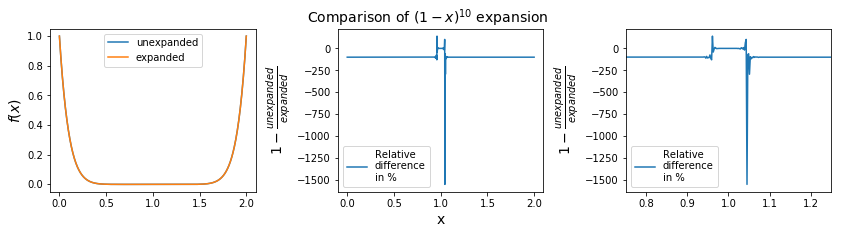

In [63]:
xi = np.linspace(0, 2, 1000)

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

ax1.plot(xi, f1(xi), label = "unexpanded")
ax1.plot(xi, f2(xi), label = "expanded")
ax1.legend(loc="best")
ax1.set_ylabel("$f(x)$", fontsize=14)

ax2.plot(xi, 1.-f1(xi)/f2(xi) * 100, label="Relative\ndifference\nin %")
ax2.legend(loc="best")
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel(r"$1-\frac{unexpanded}{expanded}$", fontsize=14)

ax3.set_xlim(0.75, 1.25)
ax3.plot(xi, 1.-f1(xi)/f2(xi) * 100, label="Relative\ndifference\nin %")
ax3.legend(loc="best")
ax3.set_ylabel(r"$1-\frac{unexpanded}{expanded}$", fontsize=14)

plt.suptitle("Comparison of $(1-x)^{10}$ expansion", fontsize=14)
plt.subplots_adjust(wspace=0.4)
plt.show()

As we can see on the graph, for most of the domain, i.e. far away from 1.0, the expansion is almost the same as the unexpanded version. Near $x=1$, the expansion creates huge errors in terms of relative difference.

### Algorithm stability
The susceptibility for a numerical algorithm to dampen (inevitable) errors, rather than to magnify them as we have seen in examples above, is termed stability. This is a concern for numerical linear algebra as considered here, as well as for the numerical solution of differential equations. In that case you don't want small errors to grow and accumulate as you propagate the solution to an ODE or PDE forward in time say. If your algorithm is not inherently stable, or has other limitation, you need to understand and appreciate this, as it can cause catastrophic failures!